In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\fuel consumption.csv")

print(df.head())

   Year   MAKE    MODEL VEHICLE CLASS  ENGINE SIZE  CYLINDERS TRANSMISSION  \
0  2000  ACURA    1.6EL       COMPACT          1.6          4           A4   
1  2000  ACURA    1.6EL       COMPACT          1.6          4           M5   
2  2000  ACURA    3.2TL      MID-SIZE          3.2          6          AS5   
3  2000  ACURA    3.5RL      MID-SIZE          3.5          6           A4   
4  2000  ACURA  INTEGRA    SUBCOMPACT          1.8          4           A4   

  FUEL  FUEL CONSUMPTION  COEMISSIONS  
0    X              10.5          216  
1    X               9.8          205  
2    Z              13.7          265  
3    Z              15.0          301  
4    X              11.4          230  


In [14]:
print(df.isnull().sum())

Year                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
COEMISSIONS         0
dtype: int64


In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB
None


In [16]:
df[df.duplicated(keep=False)]

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
377,2000,LAND ROVER,DISCOVERY SERIES II 4X4,SUV,4.0,8,A4,Z,19.6,403
378,2000,LAND ROVER,DISCOVERY SERIES II 4X4,SUV,4.0,8,A4,Z,19.6,403


In [17]:
df = df.drop_duplicates()
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 638 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              638 non-null    int64  
 1   MAKE              638 non-null    object 
 2   MODEL             638 non-null    object 
 3   VEHICLE CLASS     638 non-null    object 
 4   ENGINE SIZE       638 non-null    float64
 5   CYLINDERS         638 non-null    int64  
 6   TRANSMISSION      638 non-null    object 
 7   FUEL              638 non-null    object 
 8   FUEL CONSUMPTION  638 non-null    float64
 9   COEMISSIONS       638 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 54.8+ KB
None


In [18]:
print(df.describe())

         Year  ENGINE SIZE   CYLINDERS  FUEL CONSUMPTION  COEMISSIONS
count   638.0   638.000000  638.000000        638.000000   638.000000
mean   2000.0     3.264577    5.802508         14.705956   296.642633
std       0.0     1.231634    1.624535          3.303962    65.420203
min    2000.0     1.000000    3.000000          4.900000   104.000000
25%    2000.0     2.200000    4.000000         12.500000   253.000000
50%    2000.0     3.000000    6.000000         14.400000   288.000000
75%    2000.0     4.300000    6.000000         16.600000   343.000000
max    2000.0     8.000000   12.000000         30.200000   582.000000


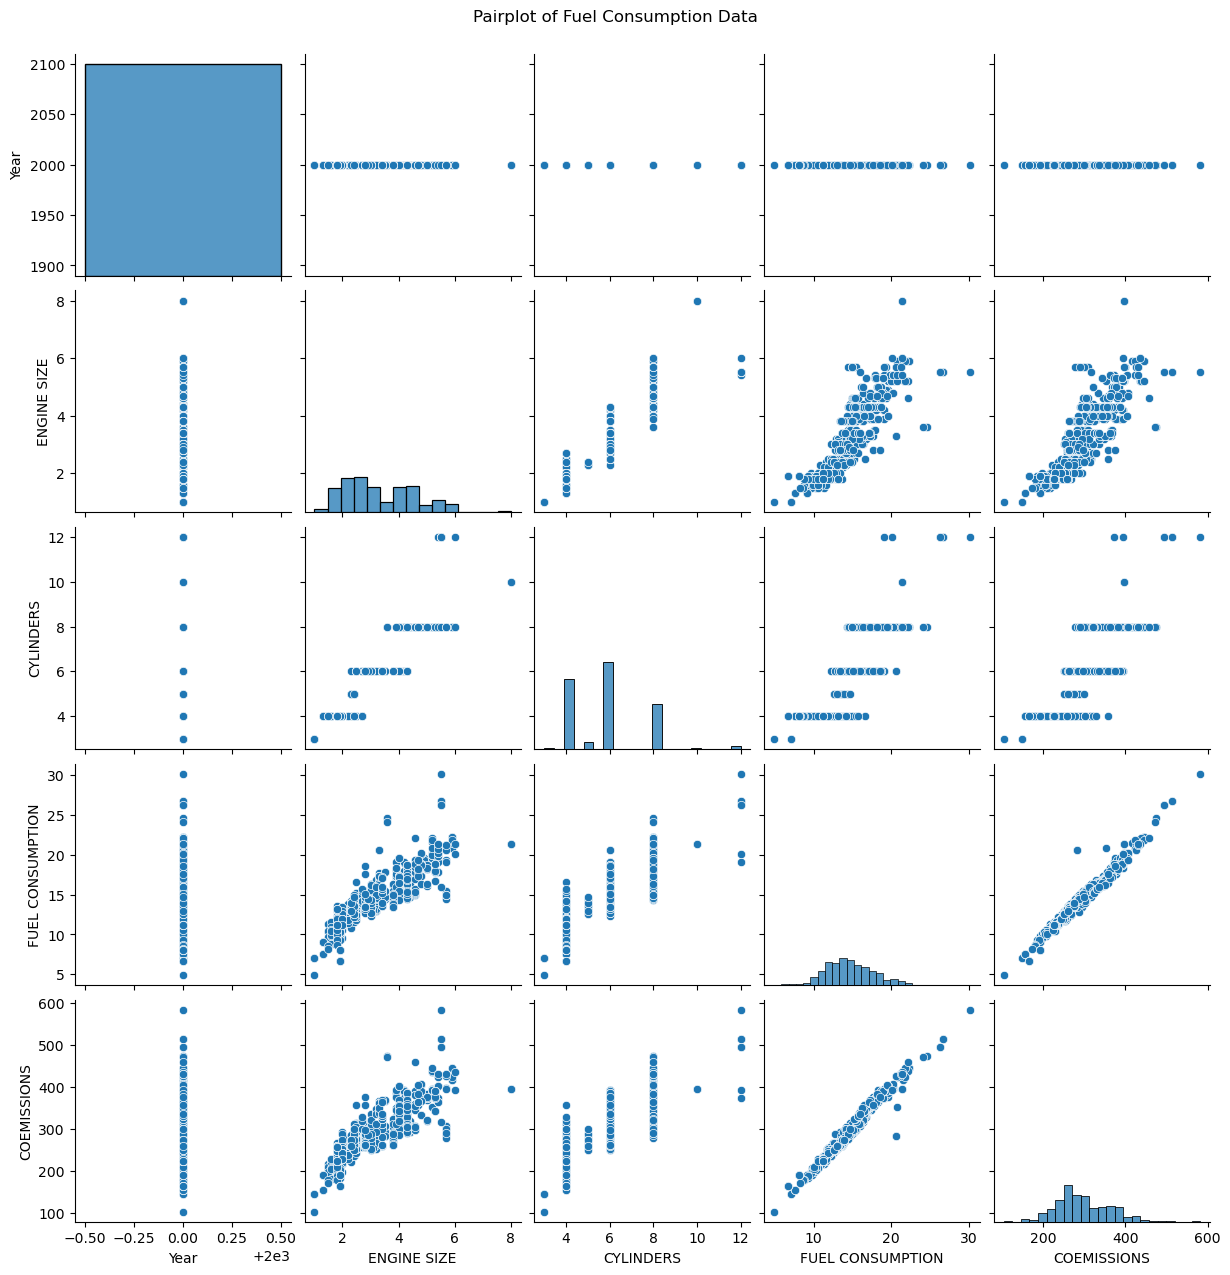

In [19]:
sns.pairplot(df)
plt.suptitle("Pairplot of Fuel Consumption Data", y=1.02)
plt.show()

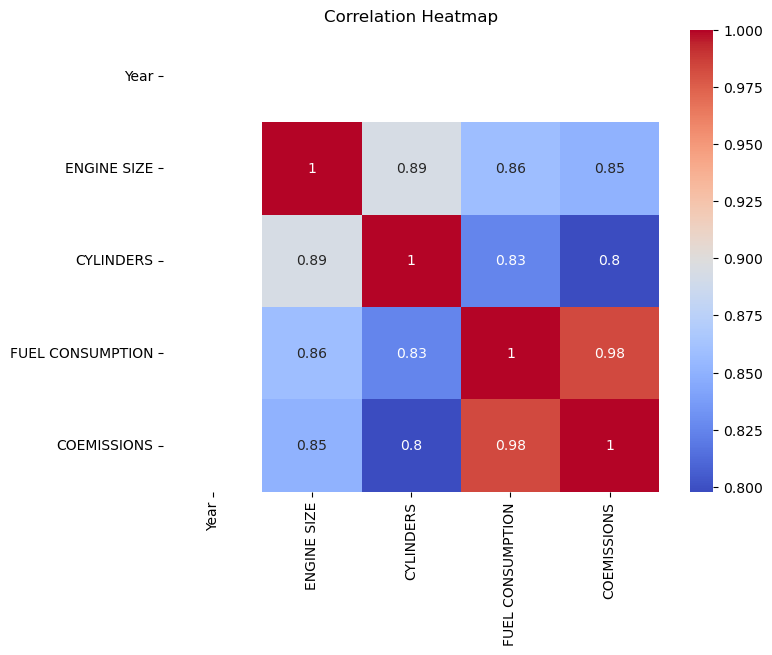

In [20]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [23]:
X = df[['ENGINE SIZE']]
y = df['COEMISSIONS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 1345.65
R² Score: 0.68


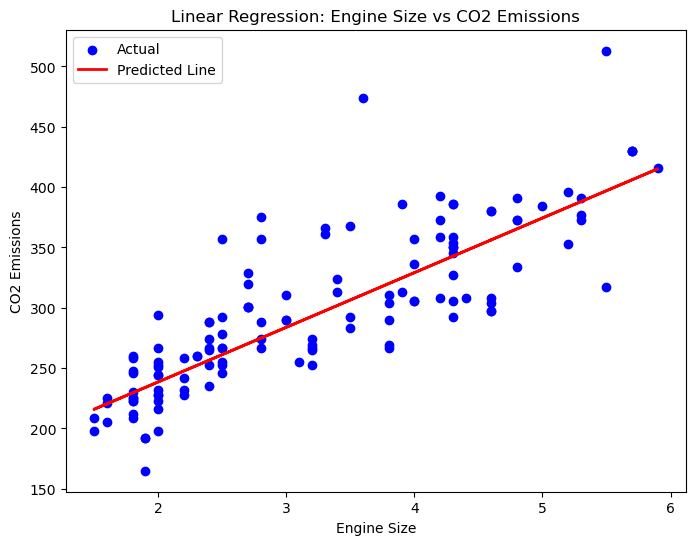

In [24]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted Line")
plt.xlabel("Engine Size")
plt.ylabel("CO2 Emissions")
plt.title("Linear Regression: Engine Size vs CO2 Emissions")
plt.legend()
plt.show()

In [25]:
X = df[['FUEL CONSUMPTION']]
y = df['COEMISSIONS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 120.20
R² Score: 0.97


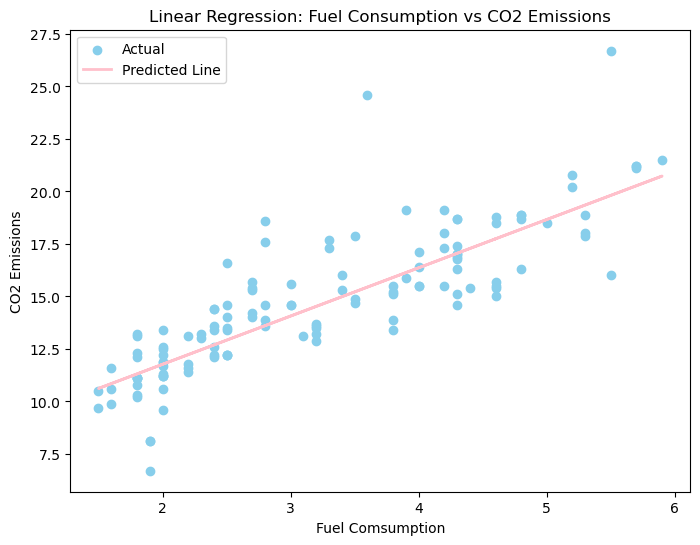

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='skyblue', label="Actual")
plt.plot(X_test, y_pred, color='pink', linewidth=2, label="Predicted Line")
plt.xlabel("Fuel Comsumption")
plt.ylabel("CO2 Emissions")
plt.title("Linear Regression: Fuel Consumption vs CO2 Emissions")
plt.legend()
plt.show()

In [28]:
X = df[['ENGINE SIZE']]
y = df['FUEL CONSUMPTION']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 3.36
R² Score: 0.69


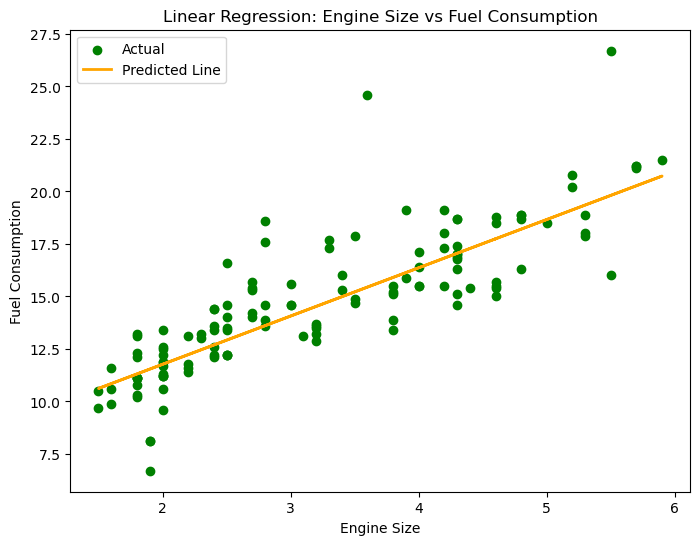

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='green', label="Actual")
plt.plot(X_test, y_pred, color='orange', linewidth=2, label="Predicted Line")
plt.xlabel("Engine Size")
plt.ylabel("Fuel Consumption")
plt.title("Linear Regression: Engine Size vs Fuel Consumption")
plt.legend()
plt.show()